# General Introduction to topic

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv
/kaggle/input/heart-disease-report/dt.png


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
print("Importing Done")

Importing Done


In [3]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA = Exploratory Data Analysis

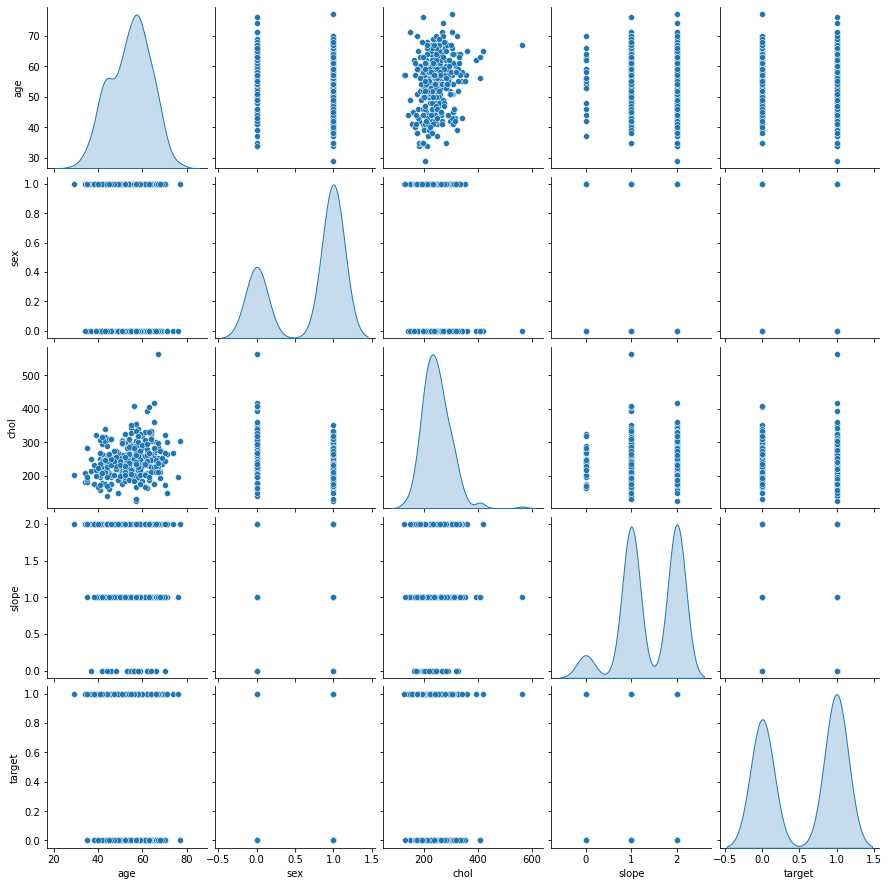

In [6]:
cols = ['age', 'sex', 'chol', 'slope', 'target'] 

# sns.pairplot(df, diag_kind = 'kde' )
sns.pairplot(df[cols], diag_kind = 'kde' )

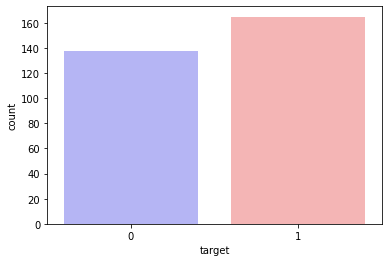

In [7]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [8]:
withDisease = len(df[df.target == 1])
withoutDisease = len(df[df.target == 0])
print("Percentage of No. of Patients have diseases:  {:.2f}".format((withDisease/len(df.target))*100))
print("Percentage of No. of Patients Don't have diseases:  {:.2f}".format((withoutDisease/len(df.target))*100))


Percentage of No. of Patients have diseases:  54.46
Percentage of No. of Patients Don't have diseases:  45.54


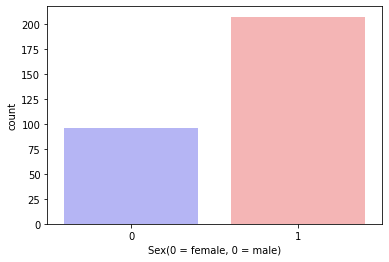

In [9]:
sns.countplot(x="sex", data=df, palette="bwr")
plt.xlabel("Sex(0 = female, 0 = male)")
plt.show()

In [10]:
femalePatient = len(df[df.sex == 0])
malePatient = len(df[df.sex == 1])
print("Percentage of male Patients: {:.2f}".format((malePatient/len(df['sex']))*100))
print("Percentage of female Patients: {:.2f}".format((femalePatient/len(df['sex']))*100))

Percentage of male Patients: 68.32
Percentage of female Patients: 31.68


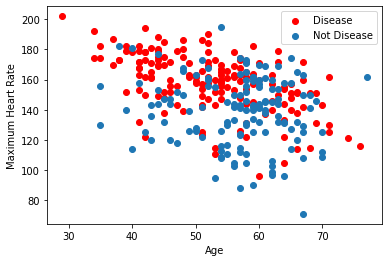

In [11]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

age      -0.225439
sex      -0.280937
chol     -0.085239
slope     0.345877
target    1.000000
Name: target, dtype: float64


<AxesSubplot:>

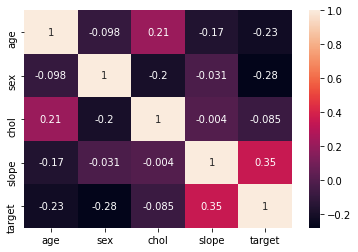

In [12]:
cols = ['age', 'sex', 'chol', 'slope', 'target'] 
cor=df[cols].corr()
# cor = df.corr()
print(cor['target'])
sns.heatmap(cor,annot=True)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


<AxesSubplot:>

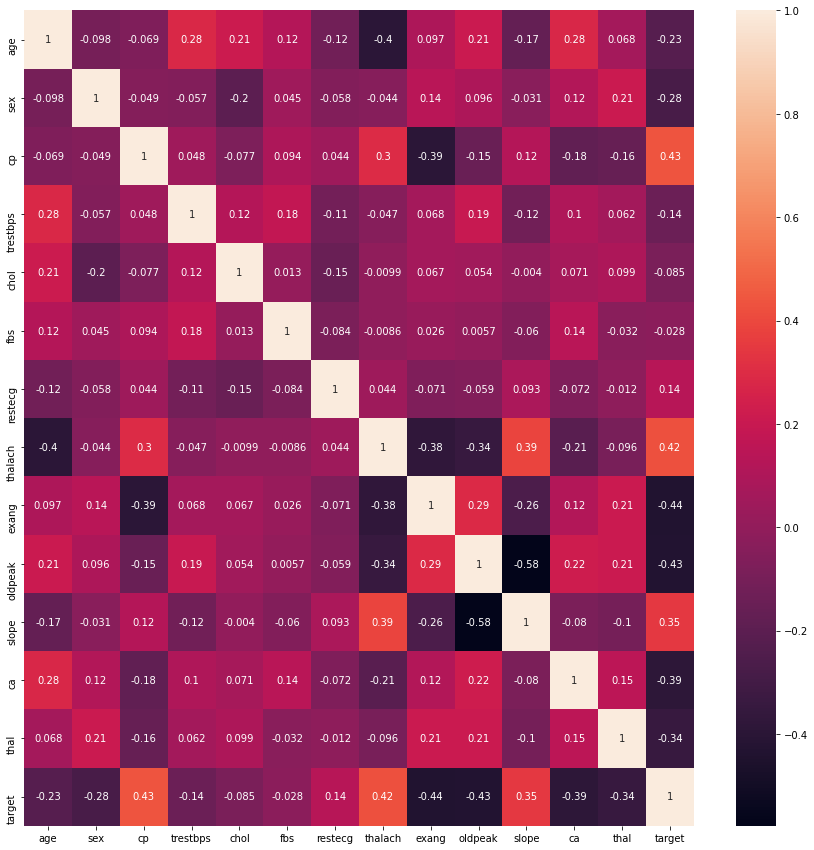

In [13]:
cor=df.corr()
print(cor['target'])
plt.figure(figsize = (15, 15))
sns.heatmap(cor, annot = True)

# Train and Test Split Data

In [14]:
X = df.drop('target', axis = 'columns') # features 
y = df['target']  # labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [15]:
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                        X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

print(numerical_cols)
print(categorical_cols)


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
[]


As we can see we don't have any categorical column over there 
and for numericals column we are going to use simpleImputer if there is any missing values found in between

# Preprocessing steps

In [16]:
# preprocessing for numerical transformer
numerical_transformer = SimpleImputer(strategy = 'constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = "most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data

preprocessor = ColumnTransformer(
transformers = [
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

## Applying Different Models

In [17]:

pipeline_lr = Pipeline([
    ('preprocessor1', preprocessor),
    ("Scalar1", StandardScaler()),
    ("lr_classifier", LogisticRegression(random_state = 0))
])

pipeline_gnb = Pipeline([
    ('preprocessor2', preprocessor),
    ("Scalar2", StandardScaler()),
    ("gnb_classifier", GaussianNB())
])

pipeline_sgd = Pipeline([
    ('preprocessor3', preprocessor),
    ("Scalar3", StandardScaler()),
    ('sgd_classifier', SGDClassifier())
])

pipeline_knn = Pipeline([
    ('preprocessor4', preprocessor),
    ("Scalar4", StandardScaler()),
    ("knn_classifier", KNeighborsClassifier())
])

pipeline_dtc = Pipeline([
    ('preprocessor5', preprocessor),
    ("Scalar5", StandardScaler()),
    ("dtc_classifier", DecisionTreeClassifier())
])

pipeline_rfc = Pipeline([
    ('preprocessor6', preprocessor),
    ("Scalar6", StandardScaler()),
    ("rfc_classifier", RandomForestClassifier())
])

pipeline_svc = Pipeline([
    ('preprocessor7', preprocessor),
    ("Scalar7", StandardScaler()),
    ("svc_classifier", SVC())
])

<h2> KNeighbours Classifier</h2[](http://)>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" width="400px"/>

## List of Pipeline

In [18]:
pipelines = [pipeline_lr, pipeline_gnb, pipeline_sgd, pipeline_knn, pipeline_dtc, pipeline_rfc, pipeline_svc]

In [19]:
best_accuracy = 0.0
best_classifer = 0
best_pipeline = ""

In [20]:
pipe_dict = {
    0: 'Logistic Regression Classifier',
    1: 'GaussianNB Classifier',
    2: 'SGD Classifier',
    3: 'KNeighbors Classifer',
    4: 'DecisionTree Classifier',
    5: 'Random Forest Classifier',
    6: 'Support Vector Classifier(SVC)'
}

## Model Training

In [21]:
for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
print("Done with Model Training :-) \n Now you can go for testing")

Done with Model Training :-) 
 Now you can go for testing


## LETS GO FOR MODEL SCORE

In [22]:
for i, model in enumerate(pipelines):
    print("{} Test Accuracy {}".format(pipe_dict[i], model.score(X_test, y_test)))

Logistic Regression Classifier Test Accuracy 0.7377049180327869
GaussianNB Classifier Test Accuracy 0.6721311475409836
SGD Classifier Test Accuracy 0.6885245901639344
KNeighbors Classifer Test Accuracy 0.7704918032786885
DecisionTree Classifier Test Accuracy 0.7540983606557377
Random Forest Classifier Test Accuracy 0.8360655737704918
Support Vector Classifier(SVC) Test Accuracy 0.7377049180327869


### Till now we have score of different model , but how we will come to know which model is best for our dataset. So lets go to know our best model

In [23]:
for i, model in enumerate(pipelines):
    score = model.score(X_test, y_test)
    if score > best_accuracy :
        best_accuracy = score
        best_pipeline = model
        best_classifier = i

print("Classifier with best accuracy: {} with score {:.2f}%".format(pipe_dict[best_classifier], best_accuracy*100))

Classifier with best accuracy: Random Forest Classifier with score 83.61%


## Now using cross validation let's check our best model

In [24]:
best_cross_model = ""
best_accuracy = 0.0
accuracy_list = []
from sklearn.model_selection import cross_val_score
for i, model in enumerate(pipelines):
    score = cross_val_score(model, X, y, cv= 10, scoring = 'accuracy').mean()
    accuracy_list.append(score)
    if score > best_accuracy:
        best_cross_model = i
        best_accuracy = score
print("Classifier with best accuracy by cross validation method : {} with score of {:.2f}%".format(pipe_dict[best_cross_model], best_accuracy*100))

Classifier with best accuracy by cross validation method : Support Vector Classifier(SVC) with score of 82.83%


In [25]:
accuracy_list

[0.8116129032258066,
 0.8050537634408602,
 0.7882795698924732,
 0.8217204301075268,
 0.7650537634408602,
 0.8281720430107526,
 0.8282795698924732]

In [26]:
pipe_dict.values()

dict_values(['Logistic Regression Classifier', 'GaussianNB Classifier', 'SGD Classifier', 'KNeighbors Classifer', 'DecisionTree Classifier', 'Random Forest Classifier', 'Support Vector Classifier(SVC)'])

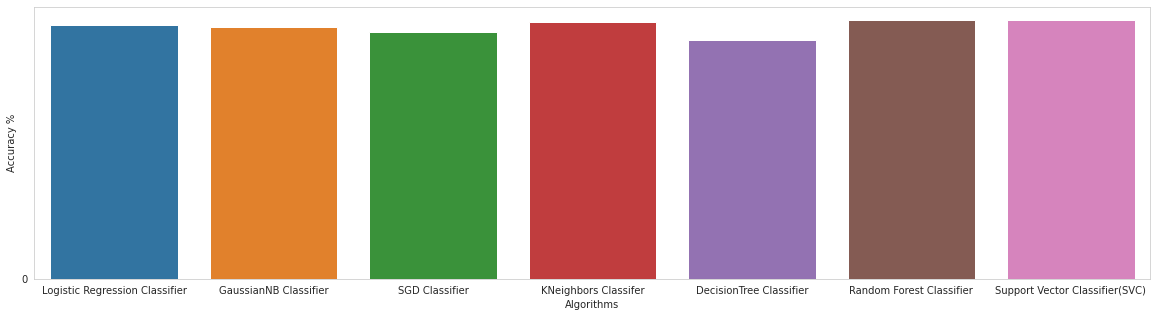

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(pipe_dict.values()), y=accuracy_list)
plt.show()

## so far we saw that with general training dataset our decision tree was working best but with cross validation we get to know that support vector classifier is much better with different training sets 
## *So now we're ready to move with our SUPPORT VECTOR CLASSIFIER model*

In [28]:
output = pd.DataFrame(pipelines[best_classifier].predict(X_test))
output.to_csv("Output.csv")